In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/m0t0r-vehicles-collisions/Motor_Vehicle_Collisions_-_Crashes.csv
/kaggle/input/vehicle-collisions/database.csv


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the csv file

In [2]:
df=pd.read_csv('/kaggle/input/m0t0r-vehicles-collisions/Motor_Vehicle_Collisions_-_Crashes.csv')
df.head(4)

/tmp/ipykernel_33/3629385086.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/kaggle/input/m0t0r-vehicles-collisions/Motor_Vehicle_Collisions_-_Crashes.csv')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.8665,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN


### Dataset Overview

#### number of rows and columns in a dataset

In [4]:
df.shape

(2081081, 29)

### Datatypes of each column

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081081 entries, 0 to 2081080
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

#### summary statistics of numerical columns

In [10]:
df.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.847065e+06,1.847065e+06,2.081063e+06,2.081050e+06,2.081081e+06,2.081081e+06,2.081081e+06,2.081081e+06,2.081081e+06,2.081081e+06,2.081081e+06
mean,4.062739e+01,-7.375157e+01,3.104620e-01,1.497321e-03,5.665277e-02,7.419221e-04,2.684614e-02,1.148442e-04,2.232864e-01,6.174676e-04,3.163852e+06
std,1.983709e+00,3.728332e+00,7.004309e-01,4.080669e-02,2.442584e-01,2.770054e-02,1.636427e-01,1.076067e-02,6.615695e-01,2.718710e-02,1.505282e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066778e+01,-7.397483e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.156390e+06
50%,4.072079e+01,-7.392726e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.676782e+06
75%,4.076961e+01,-7.386673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.197299e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.717899e+06


#### summary of categorical columns

In [11]:
df.describe(include='object')

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
count,2081081,2081081,1433563,1433312.0,1847065,1638884,1293727,349824,2074244,1758014,148792,33616,9118,2067293,1682507,143386,32447,8839
unique,4306,1440,5,427.0,283890,18440,20251,226869,61,61,51,41,30,1642,1826,262,102,71
top,01/21/2014,16:00,BROOKLYN,11207.0,"(0.0, 0.0)",BROADWAY,3 AVENUE,772 EDGEWATER ROAD,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Sedan,Sedan,Sedan,Sedan,Sedan
freq,1161,28451,456115,20810.0,4386,17277,9843,402,708137,1480124,138707,31708,8595,579207,405051,44632,10859,3071


#### count of null values in each column

In [12]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           647518
ZIP CODE                          647769
LATITUDE                          234016
LONGITUDE                         234016
LOCATION                          234016
ON STREET NAME                    442197
CROSS STREET NAME                 787354
OFF STREET NAME                  1731257
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6837
CONTRIBUTING FACTOR VEHICLE 2     323067
CONTRIBUTING FACTOR VEHICLE 3    1932289
CONTRIBUTING FACTOR VEHICLE 4    2047465
CONTRIBUTING FACTOR VEHICLE 5    2071963
COLLISION_ID                           0
VEHICLE TYPE COD

#### some columns are filled with null values, so we will drop those columns along with some useless columns collision_id,latitude,longitude,location

In [13]:
drooping_columns=['OFF STREET NAME','CONTRIBUTING FACTOR VEHICLE 3',
                  'CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5',
                 'VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5','LATITUDE','LONGITUDE','LOCATION','COLLISION_ID']


In [14]:
df.drop(columns=drooping_columns,axis=1,inplace=True)
df.shape

(2081081, 18)

### DATA EXPLORATION

#### Correlation Table---Relation between numerical columns

In [15]:
df.corr(numeric_only=True)

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
NUMBER OF PERSONS INJURED,1.000000,0.014587,0.276388,0.002047,0.172316,-0.001415,0.905968,0.020466
NUMBER OF PERSONS KILLED,0.014587,1.000000,0.005326,0.687685,-0.004149,0.277565,0.014493,0.665757
NUMBER OF PEDESTRIANS INJURED,0.276388,0.005326,1.000000,0.010903,-0.032869,0.000450,-0.067392,-0.003097
NUMBER OF PEDESTRIANS KILLED,0.002047,0.687685,0.010903,1.000000,-0.002910,0.020671,-0.000990,0.005134
NUMBER OF CYCLIST INJURED,0.172316,-0.004149,-0.032869,-0.002910,1.000000,0.001524,-0.052081,-0.003726
NUMBER OF CYCLIST KILLED,-0.001415,0.277565,0.000450,0.020671,0.001524,1.000000,-0.001982,-0.000242
NUMBER OF MOTORIST INJURED,0.905968,0.014493,-0.067392,-0.000990,-0.052081,-0.001982,1.000000,0.023860
NUMBER OF MOTORIST KILLED,0.020466,0.665757,-0.003097,0.005134,-0.003726,-0.000242,0.023860,1.000000


#### relation between numerical columns
    no of persons injured --- no of motorist  injured---0.9
     
     no of persons killed --- no of pedestrains killed---0.68
                             no of motorist killed --- 0.66
                             no of cyclist killed --- 0.27
                             
     Latitude and Longitude have inverse relationship almost equal -1 so we drop any one of them

### Univariate Analysis


#### plotting Boxplot and Histplot for continuous columns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

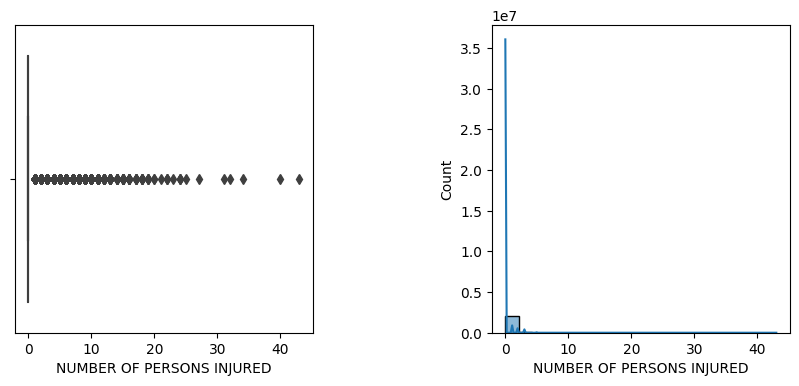

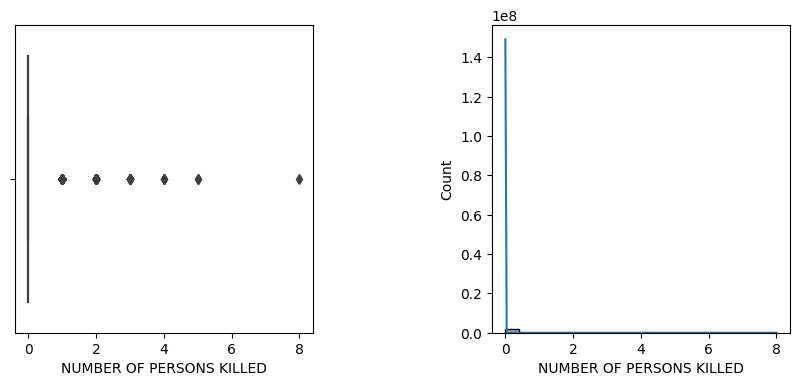

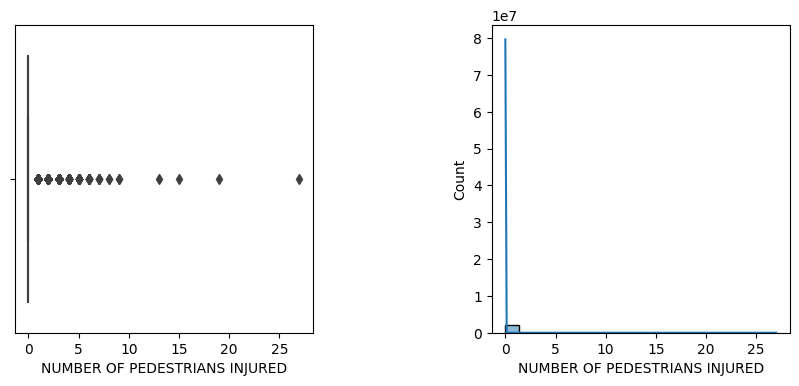

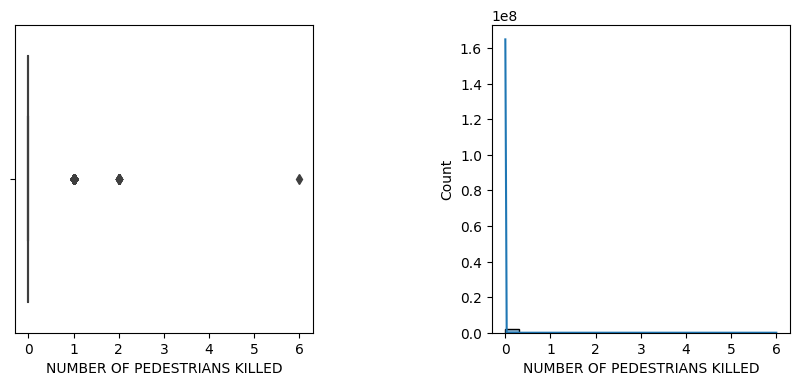

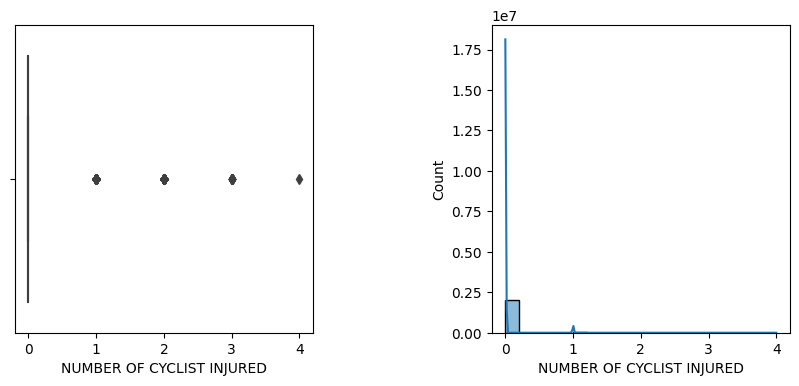

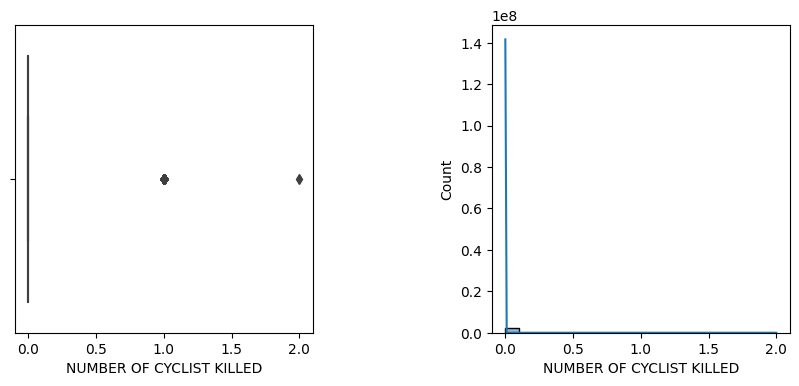

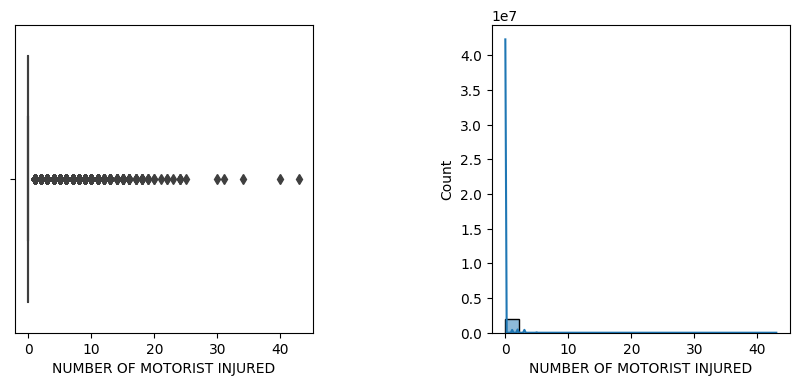

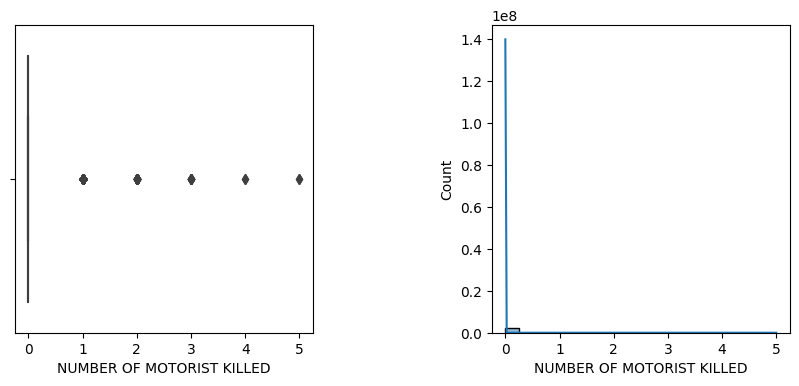

In [16]:
def cont_visua(col):
    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(10,4))
    sns.boxplot(data=df,x=col,ax=ax[0])
    sns.histplot(data=df,x=col,kde=True,bins=20,ax=ax[1])
    plt.subplots_adjust(wspace=0.6)

cont_visua('NUMBER OF PERSONS INJURED')
cont_visua('NUMBER OF PERSONS KILLED')
cont_visua('NUMBER OF PEDESTRIANS INJURED')
cont_visua('NUMBER OF PEDESTRIANS KILLED')
cont_visua('NUMBER OF CYCLIST INJURED')
cont_visua('NUMBER OF CYCLIST KILLED')
cont_visua('NUMBER OF MOTORIST INJURED')
cont_visua('NUMBER OF MOTORIST KILLED')

**
Even though most of the values of continuous columns are zero and remaining are seems to be outliers but outliers are important assets in the give data so we cannot remove them**
****There is no significant insights or patterns observed from the unvivariate analysis of continuous columns but we might see through bivariate analysis****

In [17]:
# converting 'crash date' and 'crash time' into datetime format and extracting year,month,day and hour 

df['CRASH DATE']=pd.to_datetime(df['CRASH DATE'])
df['YEAR']=df['CRASH DATE'].dt.year
df['MONTH']=df['CRASH DATE'].dt.month
df['DAY']=df['CRASH DATE'].dt.day

df['CRASH TIME']=pd.to_datetime(df['CRASH TIME'])
df['HOUR']=df['CRASH TIME'].dt.hour

/tmp/ipykernel_33/2079667845.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRASH TIME']=pd.to_datetime(df['CRASH TIME'])


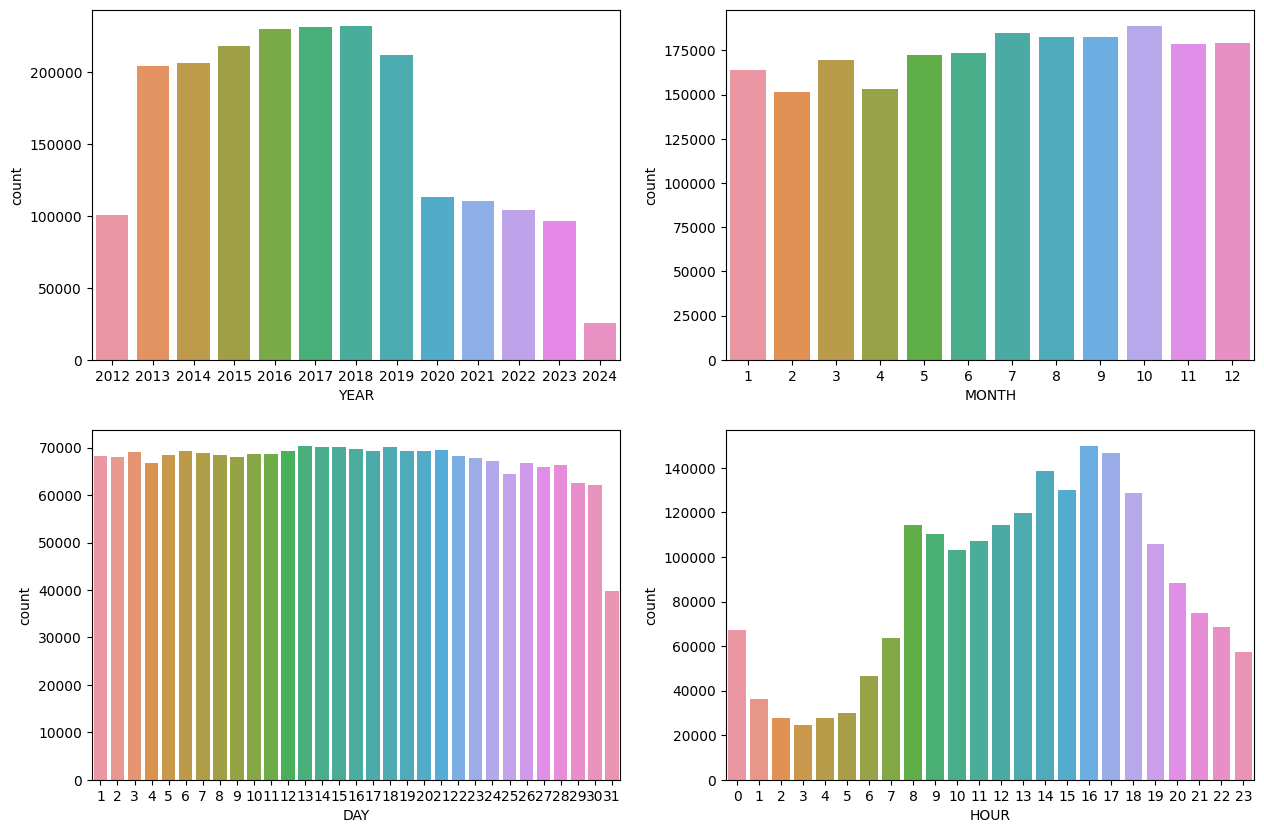

In [18]:
# plotting countplots for day,month,year and hour

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,10))

sns.countplot(data=df,x='YEAR',ax=ax[0,0])
sns.countplot(data=df,x='MONTH',ax=ax[0,1])
sns.countplot(data=df,x='DAY',ax=ax[1,0])
sns.countplot(data=df,x='HOUR',ax=ax[1,1])

plt.show()

**year---from 2013-2019 more accidents occured compared to other years**

****Hour---from 8:00 to 19:00 more accidents occured** **

<Axes: xlabel='BOROUGH', ylabel='count'>

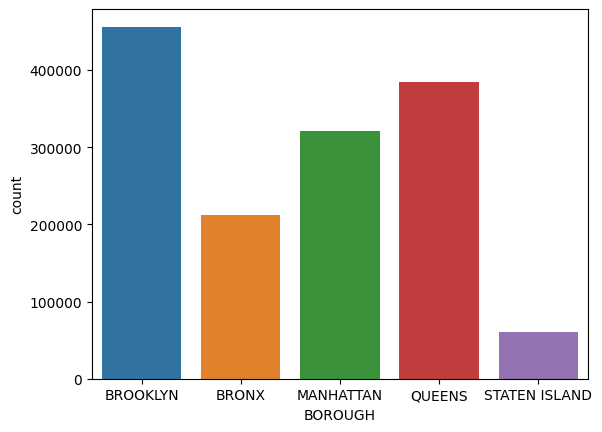

In [19]:
sns.countplot(data=df,x='BOROUGH')

**more accidents occurs BROOKLYN, QUEENS and MANHATTEN than BRONX, STATEN ISLAND**

In [20]:
top_20_cat1=df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().nlargest(20).index.tolist()
top_20_cat1

['Unspecified',
 'Driver Inattention/Distraction',
 'Failure to Yield Right-of-Way',
 'Following Too Closely',
 'Backing Unsafely',
 'Other Vehicular',
 'Passing or Lane Usage Improper',
 'Passing Too Closely',
 'Turning Improperly',
 'Fatigued/Drowsy',
 'Unsafe Lane Changing',
 'Traffic Control Disregarded',
 'Driver Inexperience',
 'Unsafe Speed',
 'Alcohol Involvement',
 'Lost Consciousness',
 'Reaction to Uninvolved Vehicle',
 'Pavement Slippery',
 'Prescription Medication',
 'View Obstructed/Limited']

In [21]:
df1=df[df['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_20_cat1)]
df1.shape

(1962375, 22)

In [22]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().nlargest(15)

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       708137
Driver Inattention/Distraction    416641
Failure to Yield Right-of-Way     123693
Following Too Closely             111280
Backing Unsafely                   76893
Other Vehicular                    64575
Passing or Lane Usage Improper     58076
Passing Too Closely                51825
Turning Improperly                 51385
Fatigued/Drowsy                    47406
Unsafe Lane Changing               40883
Traffic Control Disregarded        37005
Driver Inexperience                32636
Unsafe Speed                       29355
Alcohol Involvement                22839
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Pavement Slippery'),
  Text(1, 0, 'Following Too Closely'),
  Text(2, 0, 'Unspecified'),
  Text(3, 0, 'Passing Too Closely'),
  Text(4, 0, 'Driver Inexperience'),
  Text(5, 0, 'Passing or Lane Usage Improper'),
  Text(6, 0, 'Turning Improperly'),
  Text(7, 0, 'Unsafe Lane Changing'),
  Text(8, 0, 'Unsafe Speed'),
  Text(9, 0, 'Reaction to Uninvolved Vehicle'),
  Text(10, 0, 'Traffic Control Disregarded'),
  Text(11, 0, 'Other Vehicular'),
  Text(12, 0, 'Driver Inattention/Distraction'),
  Text(13, 0, 'Alcohol Involvement'),
  Text(14, 0, 'View Obstructed/Limited'),
  Text(15, 0, 'Failure to Yield Right-of-Way'),
  Text(16, 0, 'Lost Consciousness'),
  Text(17, 0, 'Backing Unsafely'),
  Text(18, 0, 'Fatigued/Drowsy'),
  Text(19, 0, 'Prescription Medication')])

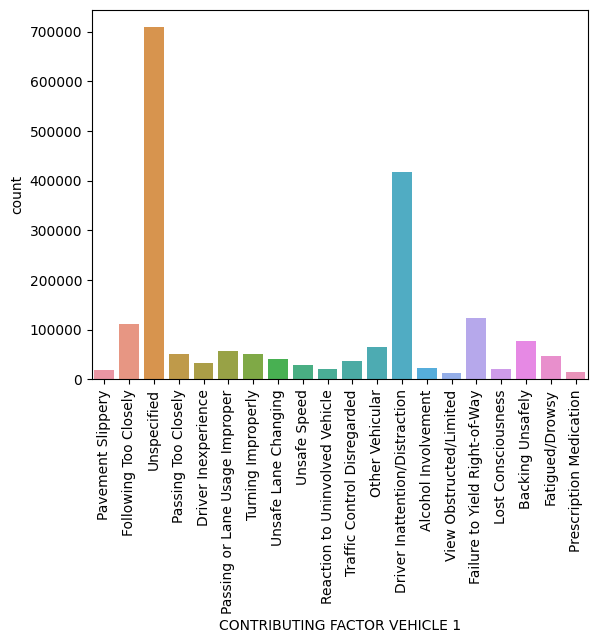

In [23]:
sns.countplot(data=df1,x='CONTRIBUTING FACTOR VEHICLE 1')
plt.xticks(rotation=90)

### BIVARIATE ANALYSIS

In [24]:
grouped_data=df1.groupby(['BOROUGH','CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index(name='count')
grouped_data

,BOROUGH,CONTRIBUTING FACTOR VEHICLE 1,count
0,BRONX,Alcohol Involvement,2650
1,BRONX,Backing Unsafely,9026
2,BRONX,Driver Inattention/Distraction,34409
3,BRONX,Driver Inexperience,3166
4,BRONX,Failure to Yield Right-of-Way,9854
...,...,...,...
95,STATEN ISLAND,Turning Improperly,1238
96,STATEN ISLAND,Unsafe Lane Changing,475
97,STATEN ISLAND,Unsafe Speed,771
98,STATEN ISLAND,Unspecified,23424


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Pavement Slippery'),
  Text(1, 0, 'Following Too Closely'),
  Text(2, 0, 'Unspecified'),
  Text(3, 0, 'Passing Too Closely'),
  Text(4, 0, 'Driver Inexperience'),
  Text(5, 0, 'Passing or Lane Usage Improper'),
  Text(6, 0, 'Turning Improperly'),
  Text(7, 0, 'Unsafe Lane Changing'),
  Text(8, 0, 'Unsafe Speed'),
  Text(9, 0, 'Reaction to Uninvolved Vehicle'),
  Text(10, 0, 'Traffic Control Disregarded'),
  Text(11, 0, 'Other Vehicular'),
  Text(12, 0, 'Driver Inattention/Distraction'),
  Text(13, 0, 'Alcohol Involvement'),
  Text(14, 0, 'View Obstructed/Limited'),
  Text(15, 0, 'Failure to Yield Right-of-Way'),
  Text(16, 0, 'Lost Consciousness'),
  Text(17, 0, 'Backing Unsafely'),
  Text(18, 0, 'Fatigued/Drowsy'),
  Text(19, 0, 'Prescription Medication')])

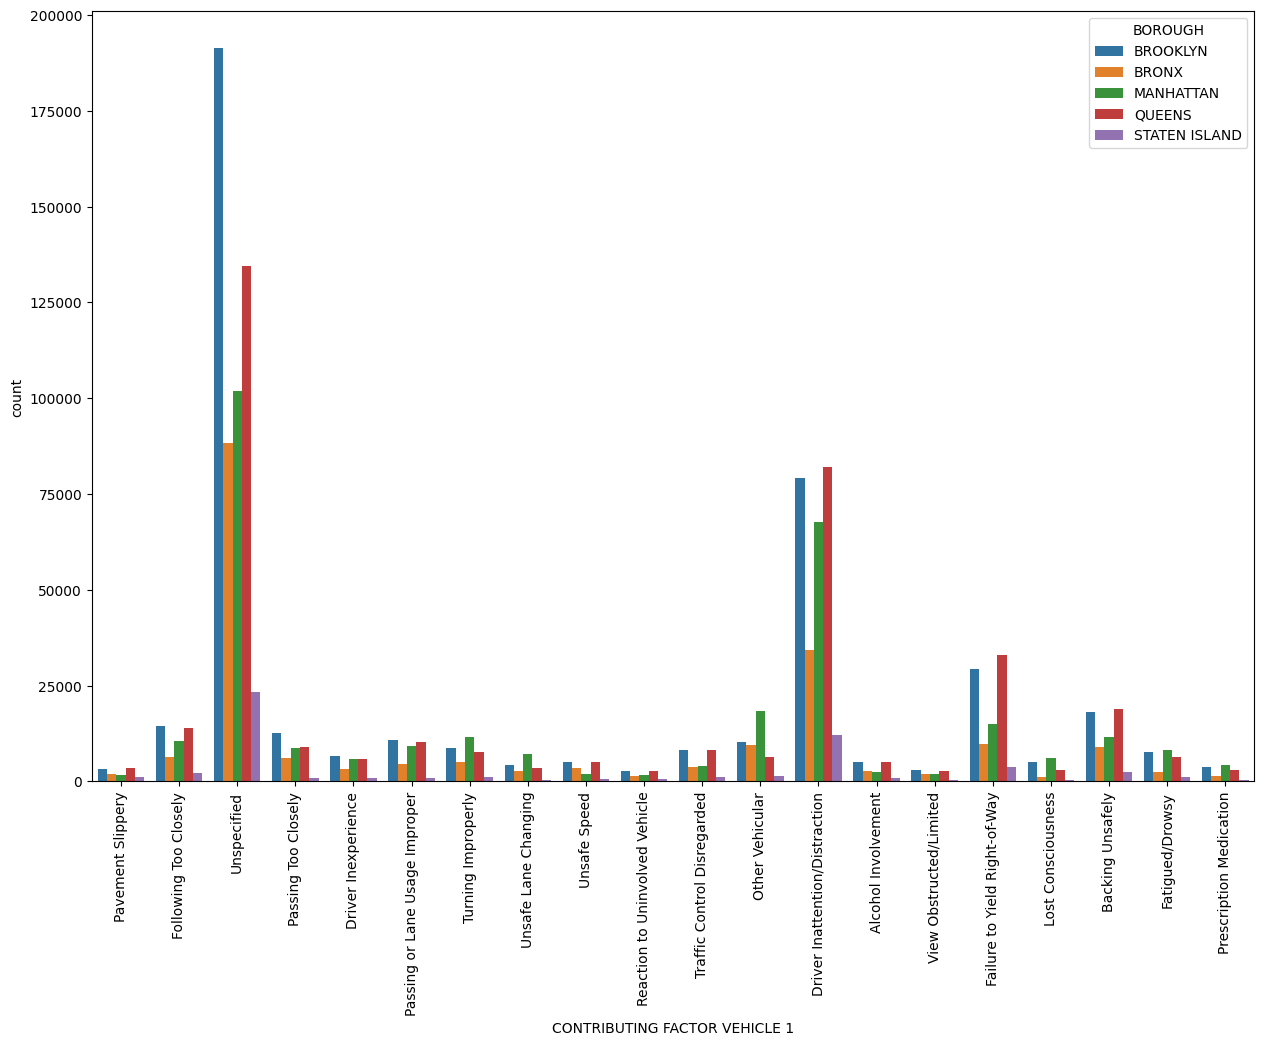

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(x='CONTRIBUTING FACTOR VEHICLE 1',hue='BOROUGH',data=df1)
plt.xticks(rotation=90)

In [29]:
yd=df.groupby(['BOROUGH'])[['NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED']].sum()
yd

,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST KILLED
BOROUGH,,,,
BRONX,278.0,135,25,109
BROOKLYN,627.0,336,69,207
MANHATTAN,332.0,237,38,53
QUEENS,529.0,277,34,213
STATEN ISLAND,95.0,39,4,51


<Axes: xlabel='BOROUGH'>

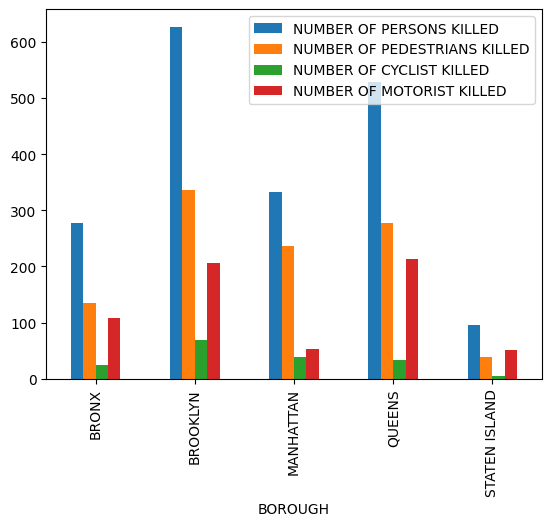

In [30]:
yd.plot.bar()

From the above graph we can conclude that                                                                                                 
In the BROOKLYN more no. of persons have killed                                                                                           
In the BROOKLYN the Pedestrains have killed are also in the large number as compared to other streets                                     
In the BROOKLYN the more Cyclist people are Killed                                                                                       
In the BROOKLYN only the more Motorist are killed as compared to other areas           

In [31]:
yc=df.groupby(['BOROUGH'])[['NUMBER OF PEDESTRIANS INJURED','NUMBER OF PERSONS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED']].sum()
yc

,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PERSONS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED
BOROUGH,,,,
BRONX,15633,69521.0,4524,48409
BROOKLYN,31990,151123.0,16968,99854
MANHATTAN,21401,67665.0,12823,32573
QUEENS,22411,115843.0,8420,83528
STATEN ISLAND,2583,17223.0,513,14065


<Axes: xlabel='BOROUGH'>

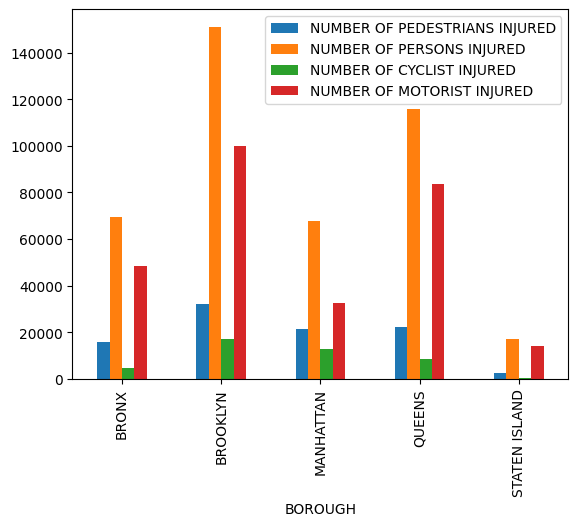

In [32]:
yc.plot.bar()

In [26]:
df.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          647518
ZIP CODE                         647769
ON STREET NAME                   442197
CROSS STREET NAME                787354
NUMBER OF PERSONS INJURED            18
NUMBER OF PERSONS KILLED             31
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      6837
CONTRIBUTING FACTOR VEHICLE 2    323067
VEHICLE TYPE CODE 1               13788
VEHICLE TYPE CODE 2              398574
YEAR                                  0
MONTH                                 0
DAY                                   0
HOUR                                  0
dtype: int64

### DATA CLEANING

#### DELECTION OF NULL ROWS

In [33]:
df2=df1.dropna()

In [34]:
df2.shape

(868311, 22)

### Removing Duplicates

In [35]:
df2.duplicated().value_counts()

False    867697
True        614
Name: count, dtype: int64

In [36]:
df2=df2.drop_duplicates()
df2.duplicated().value_counts()

False    867697
Name: count, dtype: int64

In [37]:
df2['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().nlargest(25)

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       342582
Driver Inattention/Distraction    169952
Failure to Yield Right-of-Way      61285
Following Too Closely              33576
Other Vehicular                    31472
Backing Unsafely                   29699
Turning Improperly                 26794
Fatigued/Drowsy                    24707
Traffic Control Disregarded        21464
Passing or Lane Usage Improper     20596
Passing Too Closely                15059
Lost Consciousness                 14633
Driver Inexperience                14269
Unsafe Lane Changing               13006
Prescription Medication            12060
Alcohol Involvement                 9427
Unsafe Speed                        8660
Pavement Slippery                   7956
View Obstructed/Limited             5512
Reaction to Uninvolved Vehicle      4988
Name: count, dtype: int64

##### Targeted columns CONTRIBUTED FACTOR VEHICLE 1 CATEGORIES REDUCED TO Traffic Vioation, Driving Inexperience, Non driver Related, Impaired

In [38]:
category_mapping={'Failure to Yield Right-of-Way':'Traffic Violation',
                  'Traffic Control Disregarded':'Traffic Violation',
                  'Unsafe Lane Changing':'Traffic Violation',
                  'Unsafe Speed':'Traffic Violation',
                  
                  'Turning Improperly':'Driving Negligence',
                  'Following Too Closely':'Driving Negligence',
                  'Passing Too Closely':'Driving Negligence',
                  'Backing Unsafely':'Driving Negligence',
                  'Passing or Lane Usage Improper':'Driving Negligence',
                  'Driver Inexperience':'Driving Negligence',
                  
                  'Pavement Slippery':'Non Driver Related',
                  'View Obstructed/Limited':'Non Driver Related',
                  'Reaction to Uninvolved Vehicle':'Non Driver Related',
                  'Other Vehicular':'Non Driver Related',
                  
                  'Fatigued/Drowsy':'Impaired',
                  'Lost Consciousness':'Impaired',
                  'Alcohol Involvement':'Impaired',
                  'Prescription Medication':'Impaired',           
    
}


df2['CONTRIBUTING FACTOR VEHICLE 1']=df2['CONTRIBUTING FACTOR VEHICLE 1'].replace(category_mapping)
df2['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       342582
Driver Inattention/Distraction    169952
Driving Negligence                139993
Traffic Violation                 104415
Impaired                           60827
Non Driver Related                 49928
Name: count, dtype: int64

#### Dropping crash date and crash time

In [39]:
df2.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'ON STREET NAME',
       'CROSS STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'YEAR', 'MONTH', 'DAY', 'HOUR'],
      dtype='object')

In [40]:
df2.drop(['CRASH DATE','CRASH TIME'],axis=1,inplace=True)
df2.columns

Index(['BOROUGH', 'ZIP CODE', 'ON STREET NAME', 'CROSS STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'YEAR', 'MONTH', 'DAY',
       'HOUR'],
      dtype='object')

### DATA PREPROCESSING
#### CONVERTING ALL CATEGORICAL COLUMNS INTO NUMERICAL COLUMNS USING LABEL ENCODING


In [41]:
cate_columns=df2.select_dtypes(include=['object']).columns.tolist()
cate_columns

['BOROUGH',
 'ZIP CODE',
 'ON STREET NAME',
 'CROSS STREET NAME',
 'CONTRIBUTING FACTOR VEHICLE 1',
 'CONTRIBUTING FACTOR VEHICLE 2',
 'VEHICLE TYPE CODE 1',
 'VEHICLE TYPE CODE 2']

In [42]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df2['BOROUGH']=le.fit_transform(df2['BOROUGH'])
#df['ZIP CODE']=le.fit_transform(df['ZIP CODE'])
df2['ON STREET NAME']=le.fit_transform(df2['ON STREET NAME'])
df2['CROSS STREET NAME']=le.fit_transform(df2['CROSS STREET NAME'])
df2['CONTRIBUTING FACTOR VEHICLE 1']=le.fit_transform(df2['CONTRIBUTING FACTOR VEHICLE 1'])
df2['CONTRIBUTING FACTOR VEHICLE 2']=le.fit_transform(df2['CONTRIBUTING FACTOR VEHICLE 2'])
df2['VEHICLE TYPE CODE 1']=le.fit_transform(df2['VEHICLE TYPE CODE 1'])
df2['VEHICLE TYPE CODE 2']=le.fit_transform(df2['VEHICLE TYPE CODE 2'])

In [43]:
#zip code contains both float and object values first convert every value of ZIP CODE into string and then proceed with label encoding

df2['ZIP CODE']=df2['ZIP CODE'].astype(str)
df2['ZIP CODE'].unique()

array(['10017.0', '11413.0', '11434.0', '10463.0', '10301.0', '11217.0',
       '11211.0', '10452.0', '10019.0', '11230.0', '11221.0', '11101.0',
       '11106.0', '11418.0', '11213.0', '10128.0', '11218.0', '11203.0',
       '10025.0', '11373.0', '11411.0', '10466.0', '11236.0', '11238.0',
       '11420.0', '10065.0', '11432.0', '10032.0', '11104.0', '11207.0',
       '10002.0', '11219.0', '10305.0', '11206.0', '10001.0', '10458.0',
       '10468.0', '11361.0', '10467.0', '11422.0', '11691.0', '11231.0',
       '10469.0', '10304.0', '10459.0', '10306.0', '11228.0', '11372.0',
       '11419.0', '10474.0', '11234.0', '11356.0', '11416.0', '10168.0',
       '11366.0', '11222.0', '11212.0', '11208.0', '11229.0', '10461.0',
       '11204.0', '11433.0', '10457.0', '10312.0', '10013.0', '11225.0',
       '11412.0', '11385.0', '11430.0', '11435.0', '10310.0', '10022.0',
       '11201.0', '10475.0', '10012.0', '11377.0', '11226.0', '10460.0',
       '11102.0', '10308.0', '11237.0', '10453.0', 

In [44]:
df2['ZIP CODE']=le.fit_transform(df2['ZIP CODE'])

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 867697 entries, 9 to 2081080
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   BOROUGH                        867697 non-null  int64  
 1   ZIP CODE                       867697 non-null  int64  
 2   ON STREET NAME                 867697 non-null  int64  
 3   CROSS STREET NAME              867697 non-null  int64  
 4   NUMBER OF PERSONS INJURED      867697 non-null  float64
 5   NUMBER OF PERSONS KILLED       867697 non-null  float64
 6   NUMBER OF PEDESTRIANS INJURED  867697 non-null  int64  
 7   NUMBER OF PEDESTRIANS KILLED   867697 non-null  int64  
 8   NUMBER OF CYCLIST INJURED      867697 non-null  int64  
 9   NUMBER OF CYCLIST KILLED       867697 non-null  int64  
 10  NUMBER OF MOTORIST INJURED     867697 non-null  int64  
 11  NUMBER OF MOTORIST KILLED      867697 non-null  int64  
 12  CONTRIBUTING FACTOR VEHICLE 1  867

In [57]:
df2['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
5    342582
0    169952
1    139993
4    104415
2     60827
3     49928
Name: count, dtype: int64

#### splitting the data into training and testing data

In [46]:
X=df2.drop(['CONTRIBUTING FACTOR VEHICLE 1'],axis=1)
y=df2['CONTRIBUTING FACTOR VEHICLE 1']
X.shape,y.shape

((867697, 19), (867697,))

In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9,stratify=y)
X_train.shape,y_train.shape

((607387, 19), (607387,))

### Training the Model

#### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
y_pred=lr.predict(X_test)
y_pred.shape

(260310,)

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy:',accuracy_score(y_test,y_pred))
print("Conf_matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.39504052860051475
Conf_matrix:
 [[    28    284      0      0     35  50639]
 [     9     74      0      0     18  41897]
 [     1     24      0      0      4  18219]
 [     5     56      0      0      5  14912]
 [     2     65      0      0      7  31251]
 [     0     37      0      0     14 102724]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:
               precision    recall  f1-score   support

           0       0.62      0.00      0.00     50986
           1       0.14      0.00      0.00     41998
           2       0.00      0.00      0.00     18248
           3       0.00      0.00      0.00     14978
           4       0.08      0.00      0.00     31325
           5       0.40      1.00      0.57    102775

    accuracy                           0.40    260310
   macro avg       0.21      0.17      0.10    260310
weighted avg       0.31      0.40      0.22    260310



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### DECISION TREE

In [62]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
y_pred1=dtc.predict(X_test)
y_pred1.shape

(260310,)

In [64]:
print("accuracy score:",accuracy_score(y_test,y_pred1))

accuracy score: 0.42379086473819677


#### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=23)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=23)

In [66]:
y_pred2=rfc.predict(X_test)

In [67]:
print('Accuracy Score:',accuracy_score(y_test,y_pred2))

Accuracy Score: 0.49733394798509467


#### ADABOOST

In [68]:
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                      n_estimators=100,
                      learning_rate=1,
                      random_state=9)
abc.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=100, random_state=9)

In [69]:
y_pred3=abc.predict(X_test)

In [71]:
print('Accuracy Score:',accuracy_score(y_test,y_pred3))

Accuracy Score: 0.4828588990050325


#### XG BOOST

In [72]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [73]:
import xgboost as xgb

xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [74]:
y_pred4=xgb_model.predict(X_test)

In [75]:
print('accuracy score:',accuracy_score(y_test,y_pred4))

accuracy score: 0.5592946871038378


#### CATBOOST

In [76]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [77]:
from catboost import CatBoostClassifier

cbc=CatBoostClassifier(iterations=100,learning_rate=0.1,depth=3)
cbc.fit(X_train,y_train)

0:	learn: 1.6869493	total: 406ms	remaining: 40.2s
1:	learn: 1.6155974	total: 682ms	remaining: 33.4s
2:	learn: 1.5638713	total: 963ms	remaining: 31.1s
3:	learn: 1.5234540	total: 1.24s	remaining: 29.8s
4:	learn: 1.4915091	total: 1.52s	remaining: 28.9s
5:	learn: 1.4656099	total: 1.82s	remaining: 28.5s
6:	learn: 1.4438826	total: 2.13s	remaining: 28.4s
7:	learn: 1.4261800	total: 2.43s	remaining: 27.9s
8:	learn: 1.4109132	total: 2.7s	remaining: 27.3s
9:	learn: 1.3985464	total: 2.98s	remaining: 26.8s
10:	learn: 1.3882950	total: 3.25s	remaining: 26.3s
11:	learn: 1.3787842	total: 3.52s	remaining: 25.8s
12:	learn: 1.3701628	total: 3.79s	remaining: 25.4s
13:	learn: 1.3632155	total: 4.07s	remaining: 25s
14:	learn: 1.3571924	total: 4.37s	remaining: 24.8s
15:	learn: 1.3521931	total: 4.68s	remaining: 24.6s
16:	learn: 1.3482816	total: 4.9s	remaining: 23.9s
17:	learn: 1.3445895	total: 5.2s	remaining: 23.7s
18:	learn: 1.3407403	total: 5.43s	remaining: 23.2s
19:	learn: 1.3378234	total: 5.7s	remaining: 22

In [79]:
y_pred5=cbc.predict(X_test)

In [80]:
print('Accuracy score:',accuracy_score(y_test,y_pred5))

Accuracy score: 0.5203411317275556
